# In this notebook, we will select the CBC host galaxies to make up the CBC catalogs used in this analysis

The SNR thresholds
- BBH: S/N>9
- NSBH: S/N>8

In [6]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import healpy as hp
# import ligo.skymap.plot as ligoPlot
import bilby as bb
# import ligo

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # or "sans-serif" or "monospace"
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

plt.style.use("seaborn-v0_8-paper")

# NSBHFilePath_precessing = "/global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/mockCBCCatalog_csvs/n=1e7,NSBHs,FromSkySim50_withBilbySNRs.csv"
# NSBHFilePath_aligned = "/global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/mockCBCCatalog_csvs/n=1e7,NSBHs,FromSkySim50_withBilbySNRs.csv"
BBHFilePath_precessing = "/global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/mockCBCCatalog_csvs/BBHs_0,precessing,sampledPlusSNR.csv"
BBHFilePath_aligned = "/global/homes/s/seanmacb/DESC/DESC-GW/gwStreetlights/data/mockCBCCatalog_csvs/BBHs_0,aligned,sampledPlusSNR.csv"
outPath = "catalogList"

In [4]:
BBH_aligned_DF = pd.read_csv(BBHFilePath_aligned)
BBH_precessing_DF = pd.read_csv(BBHFilePath_precessing)
# NSBH_DF = pd.read_csv(NSBHFilePath)

In [5]:
BBH_aligned_DF.rename({"minimum individual SNR":"Individual SNR minimum"},axis=1,inplace=True)
BBH_aligned_DF

,galaxyID,redshiftHubble,ra,dec,mra,mdec,mass_ratio,chirp_mass,luminosity_distance,theta_jn,psi,phase,chi_1,chi_2,Network SNR,Individual SNR minimum
0,10070200392465,2.787557,62.770779,-40.208431,172.823600,81.175717,0.843185,119.326237,23772.324284,2.299695,2.109767,2.628879,0.155300,0.060057,2.473854,1.182990
1,9814202166423,2.044943,62.394007,-37.236766,105.784619,41.289369,0.317438,116.323346,16252.753222,1.315168,2.866630,2.943843,0.229491,-0.768030,1.844235,0.465239
2,10072100184865,1.834209,67.617224,-41.572680,241.762863,70.242273,0.903382,63.699137,14204.132784,1.196491,0.925658,1.934347,0.116902,0.591217,2.398134,0.578668
3,9816101164643,1.442409,66.938860,-36.626004,330.745078,-75.967953,0.846207,113.757228,10528.900213,1.133533,1.809821,6.267067,0.835139,0.251175,6.349467,0.988400
4,10070201792402,2.190634,61.436562,-41.042127,92.144000,-15.350534,0.727091,93.887872,17693.717694,1.542628,2.591319,2.455860,0.171522,0.526389,0.985572,0.200314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9686201071622,2.492613,62.544190,-35.369961,185.429306,-39.294575,0.948780,59.376173,20736.583191,1.164657,1.187009,5.997527,0.346023,-0.272609,1.961467,0.993641
9999996,9816101815157,1.173380,67.224608,-37.116259,316.626212,-3.677308,0.755705,99.449215,8131.795058,2.472627,2.756257,1.968942,0.259125,-0.082369,7.672122,2.357164
9999997,10070100052626,1.902584,61.655855,-40.896745,173.349455,84.804486,0.496560,94.427943,14863.916642,1.793663,1.804905,3.113470,-0.085643,-0.002161,1.842920,0.645582
9999998,9814201794489,2.171678,60.824988,-37.371238,98.081873,83.720684,0.819102,77.788407,17505.164617,1.806159,2.404912,0.625993,-0.257656,0.067172,1.769257,0.313558


In [6]:
BBH_precessing_DF

,galaxyID,redshiftHubble,ra,dec,mra,mdec,mass_ratio,chirp_mass,luminosity_distance,theta_jn,psi,phase,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,Individual SNR minimum,Network SNR
0,10070200392465,2.787557,62.770779,-40.208431,172.823600,81.175717,0.628428,108.612063,23772.324284,0.365498,2.016223,1.243852,0.071766,0.268134,2.060923,1.694969,2.440478,2.561468,0.778491,2.274873
1,9814202166423,2.044943,62.394007,-37.236766,105.784619,41.289369,0.788373,19.520317,16252.753222,2.225781,1.679629,6.146094,0.303389,0.340324,1.513431,1.501956,4.338078,5.214967,0.367055,0.865741
2,10072100184865,1.834209,67.617224,-41.572680,241.762863,70.242273,0.719858,108.452347,14204.132784,1.556764,2.411695,3.901439,0.631941,0.816044,2.657589,0.842026,0.576536,3.979919,0.859224,2.694000
3,9816101164643,1.442409,66.938860,-36.626004,330.745078,-75.967953,0.460717,24.099066,10528.900213,2.106824,3.063885,4.588676,0.721221,0.757497,1.667990,1.455338,3.414003,0.497596,0.693933,1.656851
4,10070201792402,2.190634,61.436562,-41.042127,92.144000,-15.350534,0.868643,118.362719,17693.717694,1.323596,1.067543,0.604780,0.647867,0.099235,1.451340,1.823697,2.073584,3.686184,0.782388,2.219417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,9686201071622,2.492613,62.544190,-35.369961,185.429306,-39.294575,0.828631,43.747669,20736.583191,1.226367,0.134557,0.967441,0.311637,0.328895,2.442837,2.699984,6.170610,3.778158,0.434353,1.207131
9999996,9816101815157,1.173380,67.224608,-37.116259,316.626212,-3.677308,0.948487,105.852766,8131.795058,0.921572,2.820184,2.301305,0.892054,0.782219,0.683979,1.414208,3.817819,1.752152,3.957745,14.442718
9999997,10070100052626,1.902584,61.655855,-40.896745,173.349455,84.804486,0.739249,105.274892,14863.916642,1.084996,0.172659,5.197843,0.447816,0.975048,1.776455,2.439207,3.894368,5.580026,1.227440,2.486109
9999998,9814201794489,2.171678,60.824988,-37.371238,98.081873,83.720684,0.267496,98.657370,17505.164617,0.898039,0.607648,0.779254,0.690383,0.973380,2.139453,2.695994,5.206638,0.637011,0.828185,3.217567


In [7]:
def makeMask(df,threshold):
    cnd1 = np.array([x>2 for x in df["Individual SNR minimum"]])
    cnd2 = np.array([x>threshold for x in df["Network SNR"]] )
    cnd3 = np.array([x<=0 for x in df["mdec"]])
    cnd4 = np.array([(x<90 and x>0) for x in df['mra']])
    for cnd in [cnd2,cnd3,cnd4]:
        cnd1 = np.logical_and(cnd1,cnd)
    return cnd1

In [8]:
# NSMask = makeMask(NSBH_DF,8)
BBHMask_precessing = makeMask(BBH_precessing_DF,9)
BBHMask_aligned = makeMask(BBH_aligned_DF,9)

In [9]:
# NSBHSubsetDF = NSBH_DF[NSMask]
BBHSubsetDF_aligned = BBH_aligned_DF[BBHMask_aligned]
BBHSubsetDF_precessing = BBH_precessing_DF[BBHMask_precessing]

In [10]:
def makeHist(df,binName,binNum,rang,titl):
    fig,ax = plt.subplots(figsize=[10,5])

    ax.hist(df[binName],bins=binNum,range=rang,
            color='C0',
        edgecolor='black',
        linewidth=0.6,
        alpha=0.8,
        histtype='stepfilled')  # Use 'step' for outlined)

    ax.tick_params(axis='both', which='major', labelsize=10, direction='in', length=6)
    ax.tick_params(axis='both', which='minor', length=3)
    
    ax.set_xlabel(binName)
    ax.set_title(titl)
    ax.set_ylabel("Counts / bin")
    ax.grid(ls='--',which='major')
    ax.minorticks_on()
    ax.grid(ls='-.',which='minor',alpha=0.2)
    plt.tight_layout()
    return ax,fig

In [11]:
def makeHist2(data,label,binNum,rang,titl):
    fig,ax = plt.subplots(figsize=[10,5])

    ax.hist(data,bins=binNum,range=rang,
            color='C0',
        edgecolor='black',
        linewidth=0.6,
        alpha=0.8,
        histtype='stepfilled',
           label=label)  # Use 'step' for outlined)

    ax.tick_params(axis='both', which='major', labelsize=10, direction='in', length=6)
    ax.tick_params(axis='both', which='minor', length=3)

    ax.set_xlabel(label)
    ax.set_title(titl)
    ax.set_ylabel("Counts / bin")
    ax.grid(ls='--',which='major')
    ax.minorticks_on()
    ax.grid(ls='-.',which='minor',alpha=0.2)
    plt.tight_layout()
    return ax,fig

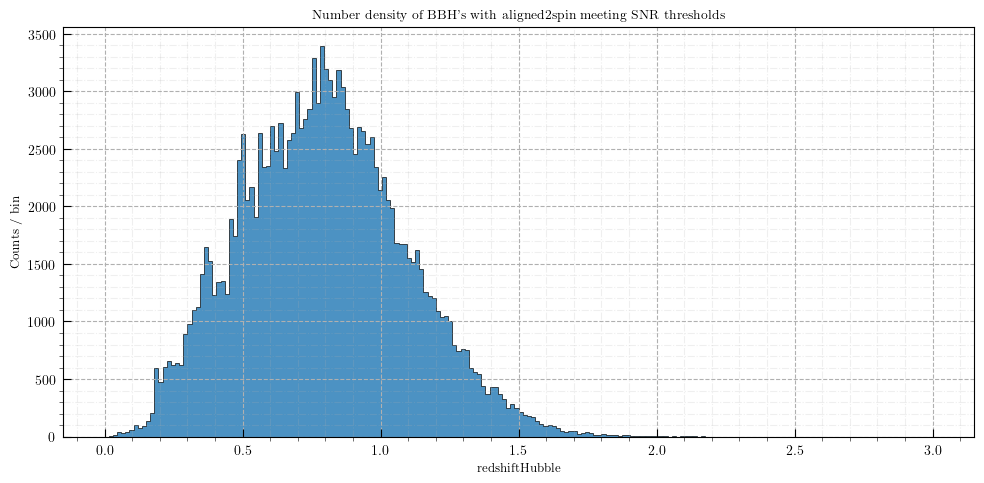

In [12]:
BBH_aligned_fig,BBH_aligned_ax = makeHist(BBHSubsetDF_aligned,"redshiftHubble",200,[0,3],"Number density of BBH's with aligned2spin meeting SNR thresholds")

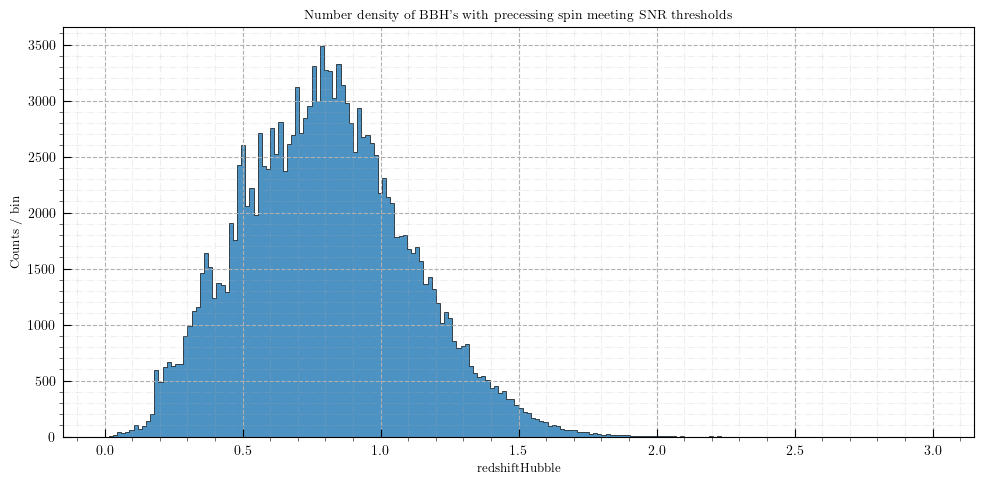

In [13]:
BBH_precessing_fig,BBH_precessing_ax = makeHist(BBHSubsetDF_precessing,"redshiftHubble",200,[0,3],"Number density of BBH's with precessing spin meeting SNR thresholds")

In [14]:
# NSBHfig,NSBHax = makeHist(NSBHSubsetDF,"redshiftHubble",100,[0,3],"Number density of NSBH's meeting SNR thresholds")

In [15]:
def sample_n_rows(df: pd.DataFrame, n: int, random_state: int = None) -> pd.DataFrame:
    """
    Return a new DataFrame with N randomly selected rows from the input DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    n : int
        The number of rows to randomly select.
    random_state : int, optional
        Seed for reproducibility. Default is None.

    Returns
    -------
    pd.DataFrame
        A new DataFrame with N randomly sampled rows.
    """
    return df.sample(n=n, random_state=random_state).reset_index(drop=True)

## First batch of BBH's, restricted to RA/dec range of the full SkySim sample

In [16]:
totSamples = 300
alignedNum,precessingNum = 0,0
for n in np.arange(300):
    flip = np.random.randint(0,2)
    if flip: # If flip==1, or spins are aligned
        alignedNum+=1
    else:
        precessingNum+=1

In [17]:
sample_precessing_bbh = sample_n_rows(BBHSubsetDF_precessing,precessingNum)
sample_aligned_bbh = sample_n_rows(BBHSubsetDF_aligned,alignedNum)

In [18]:
for d in [sample_aligned_bbh,sample_precessing_bbh]:
    print(np.min(d['Network SNR']),np.min(d['Individual SNR minimum']),np.min(d['mra']),np.min(d['mdec']),np.max(d['mra']),np.max(d['mdec']))
    print()

9.039605181308865 2.06057693242758 0.3369487563613802 -89.2165523179865 89.49623814816005 -1.2788827469776152

9.023029123356237 2.0964700868403554 0.0381496244808658 -89.88888172717998 89.79193902754923 -1.1177472531271633



In [19]:
for d in [sample_aligned_bbh,sample_precessing_bbh]:
    print(np.max(d["Individual SNR minimum"]),np.max(d["Network SNR"]),end="\n\n")

88.12799530045443 189.64833326772327

19.62723900449048 42.86374126757285



(<Axes: title={'center': 'Network SNR distribution for aligned spin BBH subsample'}, xlabel='Network SNR', ylabel='Counts / bin'>,
 <Figure size 1000x500 with 1 Axes>)

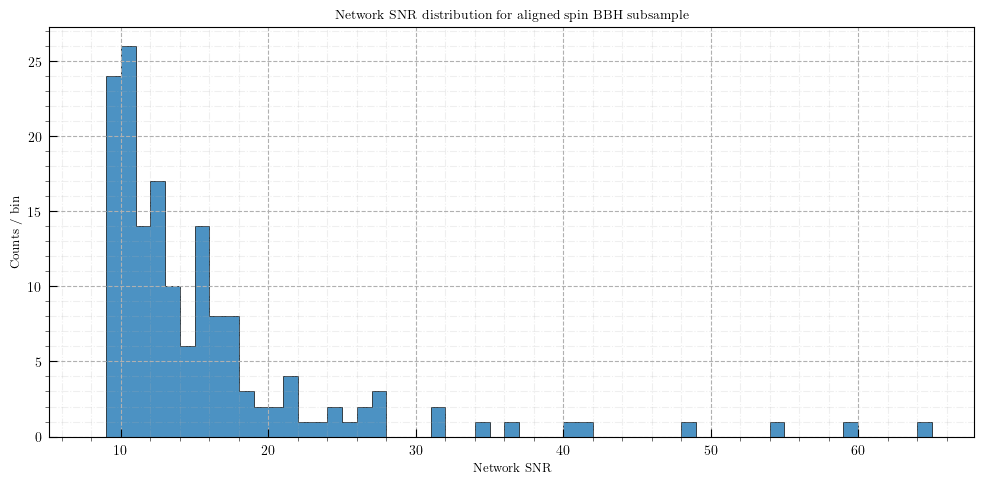

In [81]:
makeHist(sample_aligned_bbh,"Network SNR",57,[8,65],"Network SNR distribution for aligned spin BBH subsample")

(<Axes: title={'center': 'Network SNR distribution for precessing spin BBH subsample'}, xlabel='Network SNR', ylabel='Counts / bin'>,
 <Figure size 1000x500 with 1 Axes>)

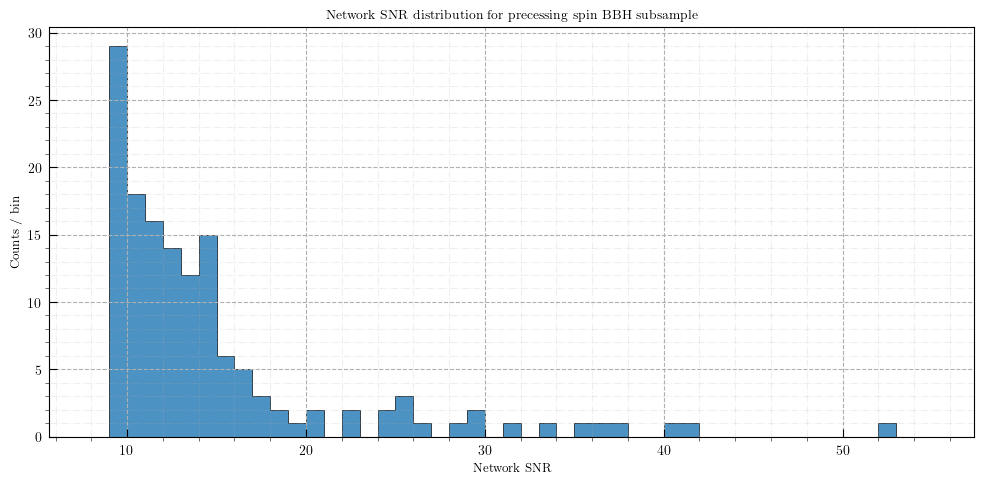

In [82]:
makeHist(sample_precessing_bbh,"Network SNR",47,[8,55],"Network SNR distribution for precessing spin BBH subsample")

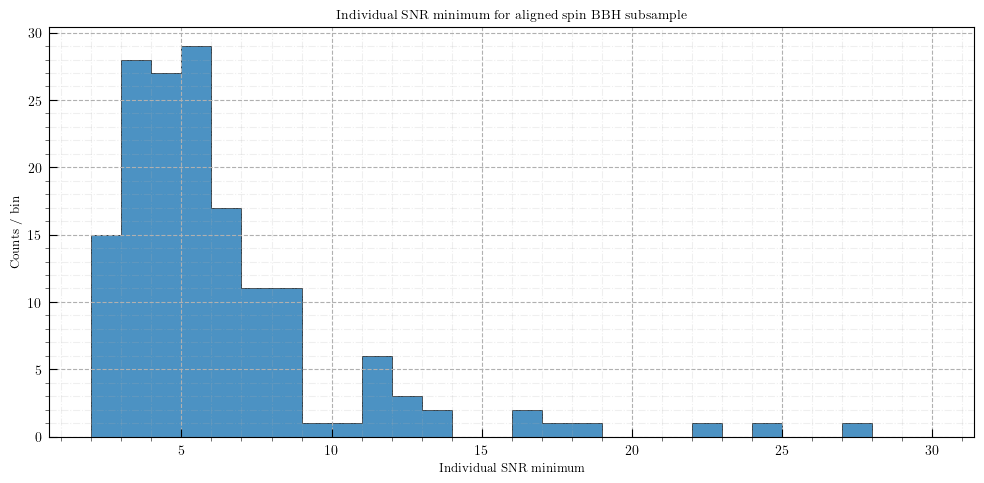

In [83]:
ax,fig = makeHist(sample_aligned_bbh,"Individual SNR minimum",28,[2,30],"Individual SNR minimum for aligned spin BBH subsample")

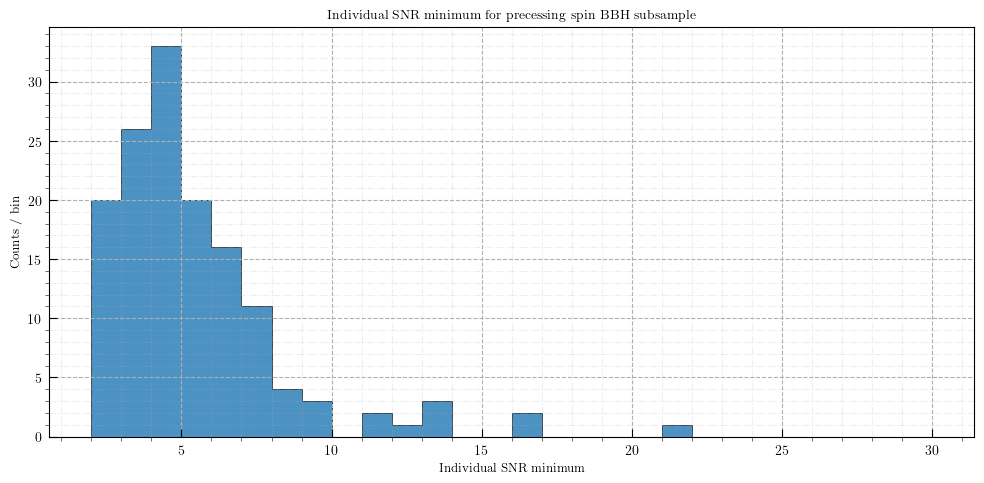

In [84]:
ax,fig = makeHist(sample_precessing_bbh,"Individual SNR minimum",28,[2,30],"Individual SNR minimum for precessing spin BBH subsample")


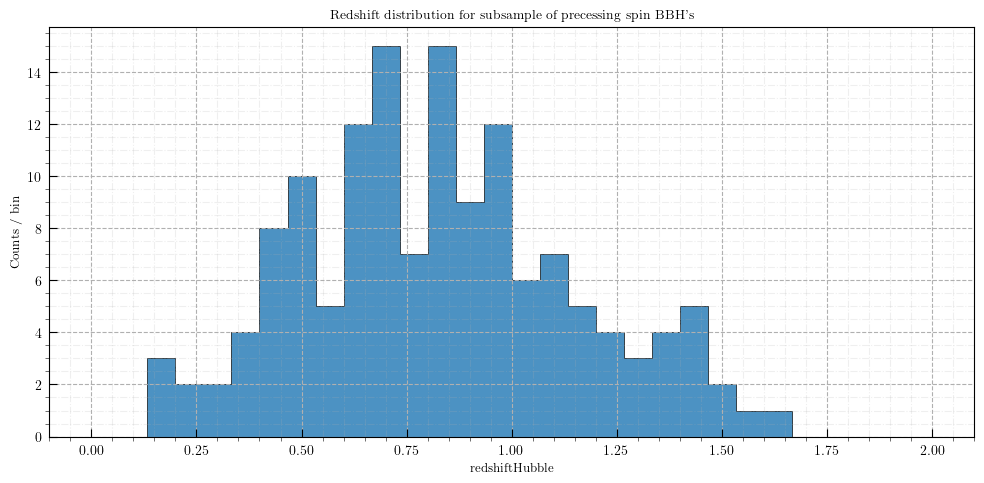

In [86]:
fig,ax = makeHist(sample_precessing_bbh,"redshiftHubble",30,[0,np.max(np.ceil(sample_precessing_bbh["redshiftHubble"]))],
                  "Redshift distribution for subsample of precessing spin BBH's")

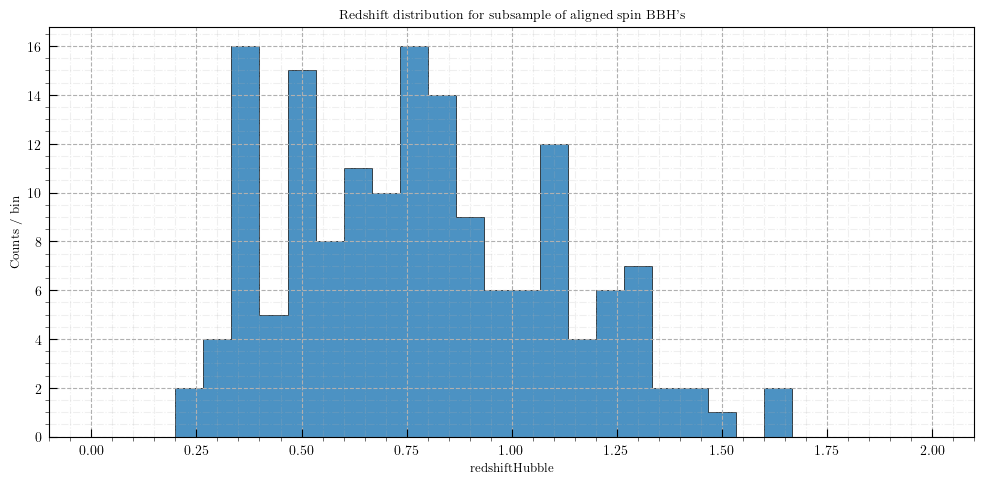

In [87]:
fig,ax = makeHist(sample_aligned_bbh,"redshiftHubble",30,[0,np.max(np.ceil(sample_aligned_bbh["redshiftHubble"]))],
                  "Redshift distribution for subsample of aligned spin BBH's")

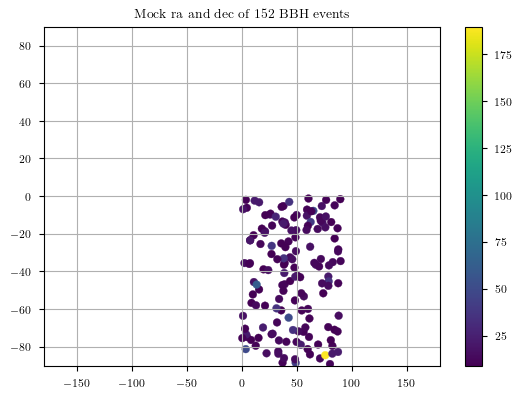

In [26]:
fig,ax = plt.subplots()
ax.set_title("Mock ra and dec of {} aligned spin BBH events".format(alignedNum))
ax.grid("-.")
cax = ax.scatter(sample_aligned_bbh["mra"],sample_aligned_bbh["mdec"],c=sample_aligned_bbh["Network SNR"])
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)
fig.colorbar(cax)

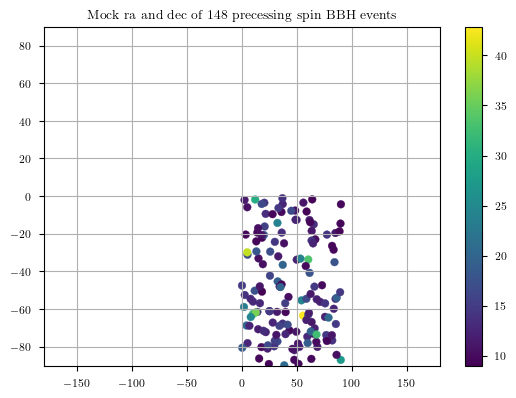

In [28]:
fig,ax = plt.subplots()
ax.set_title("Mock ra and dec of {} precessing spin BBH events".format(precessingNum))
ax.grid("-.")
cax = ax.scatter(sample_precessing_bbh["mra"],sample_precessing_bbh["mdec"],c=sample_precessing_bbh["Network SNR"])
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)
fig.colorbar(cax)

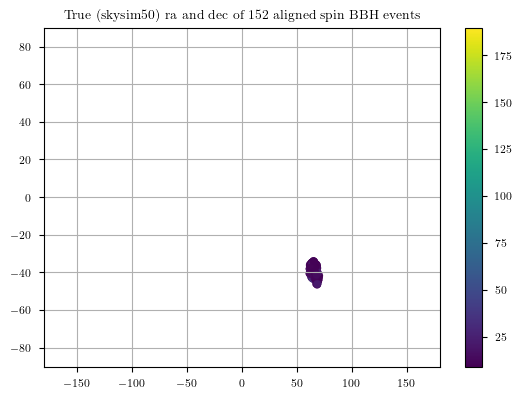

In [29]:
fig,ax = plt.subplots()
ax.set_title("True (skysim50) ra and dec of {} aligned spin BBH events".format(alignedNum))
ax.grid("-.")
cax = ax.scatter(sample_aligned_bbh["ra"],sample_aligned_bbh["dec"],c=sample_aligned_bbh["Network SNR"])
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)
fig.colorbar(cax)

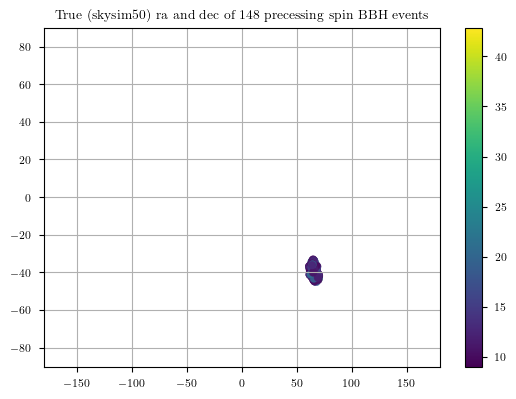

In [30]:
fig,ax = plt.subplots()
ax.set_title("True (skysim50) ra and dec of {} precessing spin BBH events".format(precessingNum))
ax.grid("-.")
cax = ax.scatter(sample_precessing_bbh["ra"],sample_precessing_bbh["dec"],c=sample_precessing_bbh["Network SNR"])
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)
fig.colorbar(cax)

In [31]:
# Compute the signal duration

def getCompMassesFromChirpAndRatio(chirp,ratio):
    m1=chirp*(ratio**(3/5) + ratio**(2/5))
    m2=chirp*(ratio**(-3/5) + ratio**(-2/5))
    return m1,m2

0.0 0.0 2.359005325918382
0.0 0.0 1.941224348184764


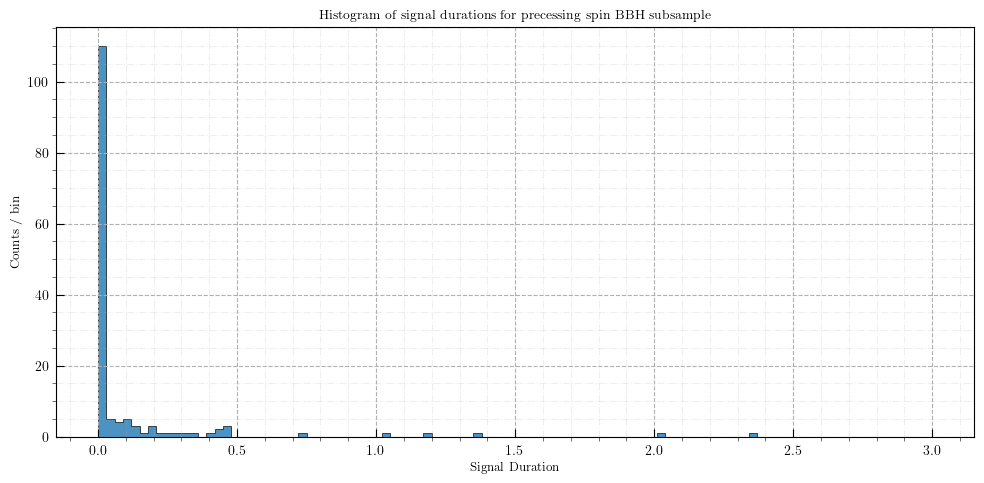

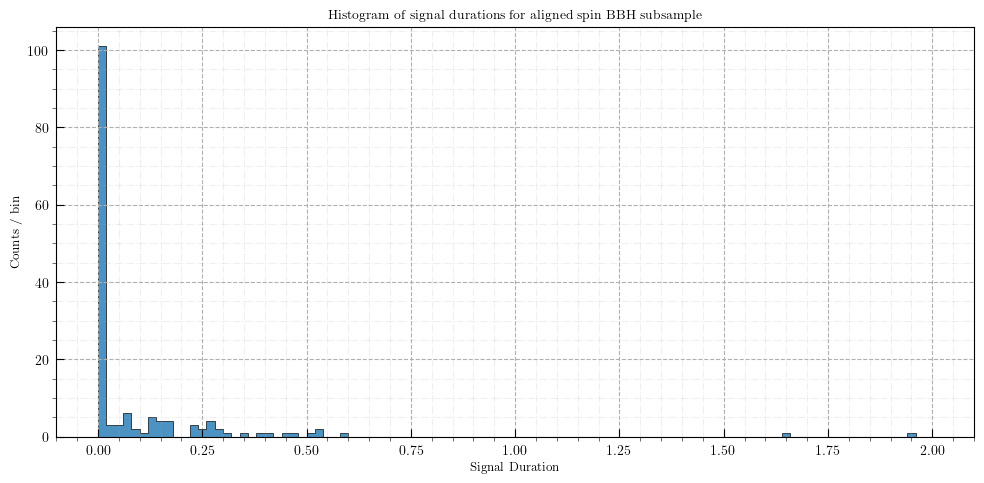

In [34]:
for firstSample,label in zip([sample_precessing_bbh,sample_aligned_bbh],["precessing","aligned"]):
    sigDuration = []
    for chirp,q in zip(firstSample["chirp_mass"],firstSample["mass_ratio"]):
        m1,m2 = getCompMassesFromChirpAndRatio(chirp,q)
        maxDur=0
        for n in range(1000):
            dur = bb.gw.utils.calculate_time_to_merger(frequency=10, mass_1=m2, mass_2=m1)
            if dur>maxDur:
                maxDur=dur
        sigDuration.append(maxDur)
    print(np.min(sigDuration),np.median(sigDuration),np.max(sigDuration),)
    ax,fig = makeHist2(sigDuration,"Signal Duration",100,(np.min(np.floor(sigDuration)),np.max(np.ceil(sigDuration))),"Histogram of signal durations for {} spin BBH subsample".format(label))

In [35]:
sample_precessing_bbh.to_csv(os.path.join(os.getcwd(),outPath,"BBH_precessing_Batch0.csv"),index=False)
sample_aligned_bbh.to_csv(os.path.join(os.getcwd(),outPath,"BBH_aligned_Batch0.csv"),index=False)

In [1]:
sample_precessing_bbh

NameError: name 'sample_precessing_bbh' is not defined